## MNIST 이미지 숫자 분류

In [4]:
import numpy as np
from sklearn.model_selection import KFold
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
x_train = x_train.reshape((x_train.shape[0], 28 * 28)).astype('float32')/255
x_test = x_test.reshape((x_test.shape[0], 28 * 28)).astype('float32')/255

In [10]:
x_test.shape

(10000, 784)

In [12]:
# K-Fold 설정
k = 5
kf = KFold(n_splits=k)

# 교차 검증 수행
fold_no = 1
for train_index, val_index in kf.split(x_train):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # 모델 생성
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # 모델 학습
    print(f'Training for fold {fold_no} ...')
    model.fit(x_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(x_val_fold, y_val_fold))

    # 검증 성능 평가
    val_loss, val_accuracy = model.evaluate(x_val_fold, y_val_fold)
    print(f'Fold {fold_no} - Validation accuracy: {val_accuracy:.4f}')

    fold_no += 1

Training for fold 1 ...
Epoch 1/10


C:\Users\a\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8612 - loss: 0.4804 - val_accuracy: 0.9516 - val_loss: 0.1666
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9604 - loss: 0.1351 - val_accuracy: 0.9670 - val_loss: 0.1130
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9742 - loss: 0.0894 - val_accuracy: 0.9716 - val_loss: 0.0967
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9796 - loss: 0.0647 - val_accuracy: 0.9710 - val_loss: 0.0920
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9845 - loss: 0.0497 - val_accuracy: 0.9732 - val_loss: 0.0905
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9875 - loss: 0.0386 - val_accuracy: 0.9718 - val_loss: 0.0954
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9915 - loss: 0.0293 - val_accuracy: 0.9738 - val_loss: 0.0968
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9943 - loss: 0.0213 - val_accurac

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step


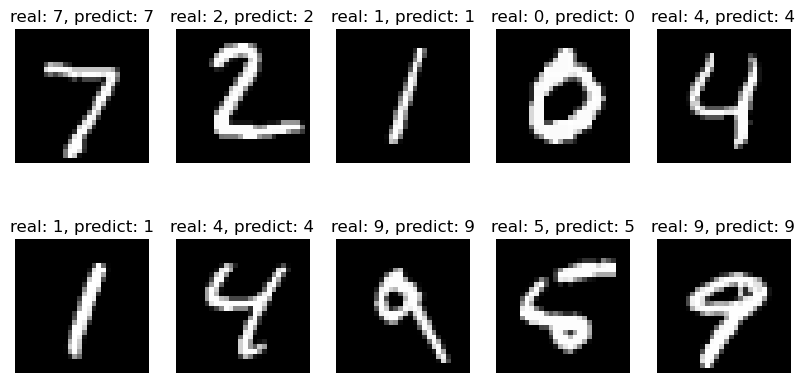

In [14]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import numpy as np

# 예측 결과 생성
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

# 10개 이미지 출력
plt.figure(figsize=(10, 5))
for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'real: {y_test[i]}, predict: {predicted_labels[i]}')
    plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Result: 5


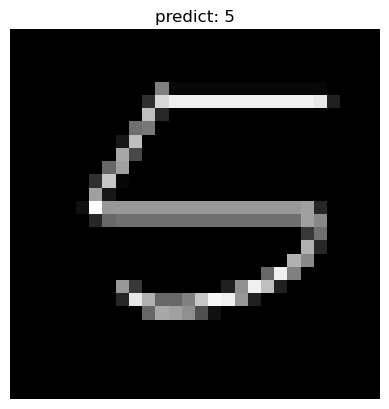

In [16]:
from PIL import Image, ImageOps

# 이미지 불러오기
image_path = 'number.png'  # 사용자 입력 이미지 경로
img = Image.open(image_path).convert('L')  # 흑백 이미지로 변환

# 이미지 크기 조정 및 정규화
img = img.resize((28, 28))
img = ImageOps.invert(img)  # 숫자를 흰색으로, 배경을 검은색으로 반전
img_array = np.array(img).astype('float32') / 255.0
img_array = img_array.reshape(1, 28 * 28)  # 모델 입력 형태에 맞게 변환

# 모델 예측
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

# 결과 출력
print(f'Result: {predicted_label}')
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f'predict: {predicted_label}')
plt.axis('off')
plt.show()